- 통계분석방법 종합실습 # 1
- 작성자 : 컴퓨터공학과 12201830 김건탁

In [ ]:
# 1
from google.colab import files
import pandas as pd
file_uploaded = files.upload()

Saving euro_cities.csv to euro_cities.csv


In [ ]:
# 2
df = pd.read_csv("euro_cities.csv")
df.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
# 3
df['Numericpopulation'] = df.Population.apply(lambda x: int(x.replace(',', '')))
df.head()

,Rank,City,State,Population,Date of census/estimate,Numericpopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [ ]:
# 4
df2 = df.set_index('City')
df2 = df2.sort_index(ascending=True)
df2.head()

,Rank,State,Population,Date of census/estimate,Numericpopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [ ]:
# 5
# df3 = df.set_index(["State", "City"]).sort_index(level=1)
df3 = df.set_index(["State", "City"]).sort_index(level=0)
df3.head(10)

Rank Population Date of census/estimate  \
State           City                                                    
 Austria        Vienna           7  1,794,770          1 January 2015   
 Belgium        Antwerp         59    510,610          1 January 2014   
                Brussels[17]    16  1,175,831          1 January 2014   
 Bulgaria       Plovdiv         84    341,041        31 December 2013   
                Sofia           14  1,291,895        14 December 2014   
                Varna           85    335,819        31 December 2013   
 Croatia        Zagreb          24    790,017           31 March 2011   
 Czech Republic Brno            76    378,327          1 January 2013   
                Prague          15  1,246,780          1 January 2013   
 Denmark        Aarhus          92    326,676          1 October 2014   

                              Numericpopulation  
State           City                             
 Austria        Vienna                  1794770  
 Belgium        Antwerp                  510610  
                Brussels[17]            1175831  
 Bulgaria       Plovdiv                  341041  
                Sofia                   1291895  
                Varna                    335819  
 Croatia        Zagreb                   790017  
 Czech Republic Brno                     378327  
                Prague                  1246780  
 Denmark        Aarhus                   326676

In [ ]:
# 6
df[df['State'].str.contains('Sweden')]

,Rank,City,State,Population,Date of census/estimate,Numericpopulation
19,20,Stockholm,Sweden,"909,976",31 January 2014,909976
52,53,Gothenburg,Sweden,"528,014",31 March 2013,528014
101,102,Malmö,Sweden,"309,105",31 March 2013,309105


In [ ]:
# 7
city_counts = df.State.value_counts()
city_counts.head(10)

 Germany           19
 United Kingdom    16
 Spain             13
 Poland            10
 Italy             10
 France             5
 Netherlands        4
 Bulgaria           3
 Sweden             3
 Romania            3
Name: State, dtype: int64

In [ ]:
# 8
df4 = df[["State", "City", "Numericpopulation"]].set_index(["State", "City"])
df5 = df4.sum(level="State").sort_values("Numericpopulation", ascending=False)
df5.head(10)

<ipython-input-12-a73a87f35057>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df5 = df4.sum(level="State").sort_values("Numericpopulation", ascending=False)


,Numericpopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


In [ ]:
# 9
top = df5.head().index

df6 = pd.concat([df.groupby("State").get_group(name) for name in top])
df6 = df6[["State", "City", "Numericpopulation"]]
df6.head()

,State,City,Numericpopulation
0,United Kingdom,London[2],8615246
16,United Kingdom,Birmingham,1092330
26,United Kingdom,Leeds,757655
38,United Kingdom,Glasgow,596550
45,United Kingdom,Sheffield,557382


In [ ]:
df7 = df6.drop("City", axis=1).groupby("State").max()
df7.head()

,Numericpopulation
State,
Germany,3437916
Italy,2872086
Poland,1729119
Spain,3165235
United Kingdom,8615246


In [ ]:
pd.merge(df6, df7, how="right", on="Numericpopulation")

,State,City,Numericpopulation
0,Germany,Berlin,3437916
1,Italy,Rome,2872086
2,Poland,Warsaw,1729119
3,Spain,Madrid,3165235
4,United Kingdom,London[2],8615246


Text(0.5, 0, 'Total pop. in top 105 cities')

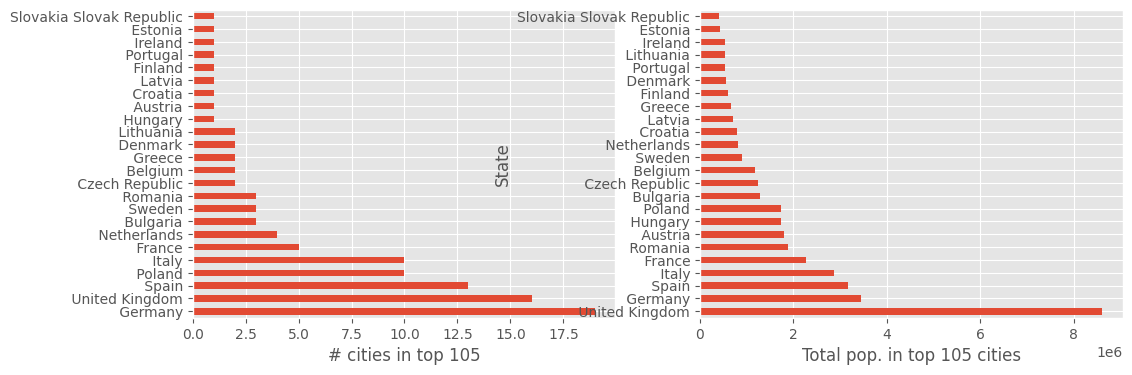

In [ ]:
# 10
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')

df8 = (df.drop("Rank", axis=1)
                 .groupby("State").max()
                 .sort_values("Numericpopulation", ascending=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df8.Numericpopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")